# Necessary Imports

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.layers import BatchNormalization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Create Train & Validate sets

In [2]:
train_dataset_directory = '/kaggle/input/nn23-dataset/dataset/train'

class_Names = sorted([str(i) for i in range(1, len(os.listdir(train_dataset_directory)) + 1)])

In [3]:
# Data loading and preprocessing
batch_size = 32 
image_size = 256  

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,  # Add rotation for more variation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    validation_split=0.2  # 80% training, 20% validation
)

train_dataset = datagen.flow_from_directory(
    directory=train_dataset_directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for integer labels
    classes=class_Names,
    subset='training',
    color_mode='grayscale',
    seed=69
)

validation_dataset = datagen.flow_from_directory(
    directory=train_dataset_directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for integer labels
    classes=class_Names,
    subset='validation',
    color_mode='grayscale',
    seed=69
)

Found 7920 images belonging to 5 classes.
Found 1980 images belonging to 5 classes.


# CNN Model

In [4]:
# Set a random seed for reproducibility
seed_value = 69
tf.random.set_seed(seed_value)

In [5]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(image_size,image_size,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(64, (7,7), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='softmax'))

In [6]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset
)

Epoch 1/100
248/248 [==============================] - 102s 373ms/step - loss: 1.7450 - accuracy: 0.3146 - val_loss: 2.7361 - val_accuracy: 0.2000
Epoch 2/100
248/248 [==============================] - 68s 275ms/step - loss: 1.5097 - accuracy: 0.3713 - val_loss: 1.9671 - val_accuracy: 0.2182
Epoch 3/100
248/248 [==============================] - 69s 277ms/step - loss: 1.4356 - accuracy: 0.3968 - val_loss: 1.4535 - val_accuracy: 0.3788
Epoch 4/100
248/248 [==============================] - 69s 277ms/step - loss: 1.3783 - accuracy: 0.4295 - val_loss: 1.4394 - val_accuracy: 0.4116
Epoch 5/100
248/248 [==============================] - 68s 274ms/step - loss: 1.3408 - accuracy: 0.4473 - val_loss: 1.3481 - val_accuracy: 0.4449
Epoch 6/100
248/248 [==============================] - 68s 274ms/step - loss: 1.3354 - accuracy: 0.4549 - val_loss: 1.4171 - val_accuracy: 0.3879
Epoch 7/100
248/248 [==============================] - 68s 272ms/step - loss: 1.3062 - accuracy: 0.4657 - val_loss: 1.4172 

# Plotting Accuracy & Loss

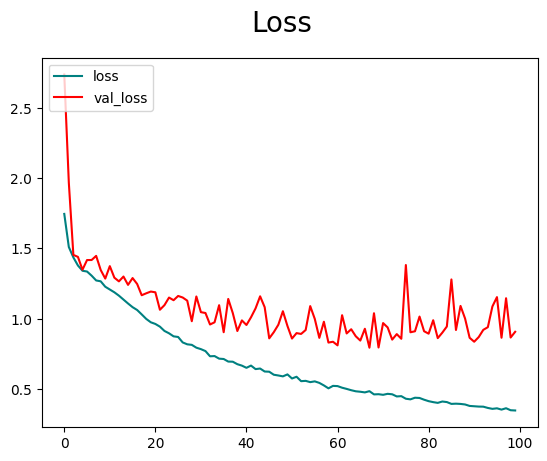

In [8]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

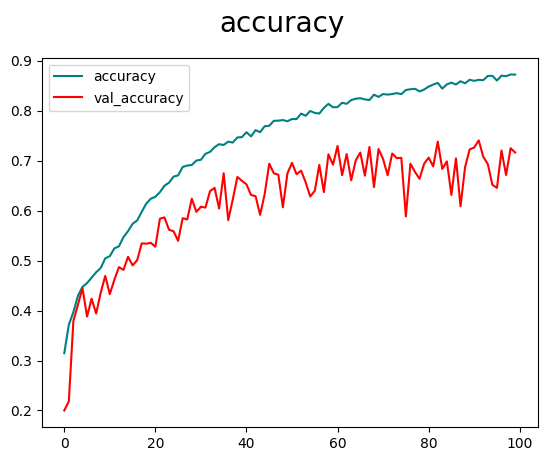

In [9]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Test Set

In [ ]:
import pandas as pd

# Test dataset directory
test_dataset_directory = '/kaggle/input/nn23-dataset/dataset/test'

# Get a list of all image filenames in the test directory
image_filenames = [i.split('.')[0] for i in os.listdir(test_dataset_directory)]

# Create a DataFrame with the image filenames
df_test = pd.DataFrame({'image_Name': image_filenames})
print(df_test)
# Load images for the test set
test_images_array = []
for filename in df_test['image_Name']:
    img_path_jpg = os.path.join(test_dataset_directory, f"{filename}.jpg")
    img_path_jpeg = os.path.join(test_dataset_directory, f"{filename}.jpeg")
    img_path_png = os.path.join(test_dataset_directory, f"{filename}.png")

    # Check if any of the file extensions (.jpg, .jpeg, .png) exists
    if os.path.exists(img_path_jpg):
        img_path = img_path_jpg
    elif os.path.exists(img_path_jpeg):
        img_path = img_path_jpeg
    elif os.path.exists(img_path_png):
        img_path = img_path_png
    else:
        print(f"Warning: Image file not found - {filename}")
        continue

    # Load and preprocess the image
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0  # Normalize pixel values to be between 0 and 1
    test_images_array.append(img)

# Convert the list of images to a numpy array
test_images_array = np.array(test_images_array)
# print(test_images_array)

In [ ]:
predictions = model.predict(test_images_array)

# Get the predicted class indices
predicted_class_indices = predictions.argmax(axis=-1) + 1  # Adding 1 to make classes start from 1

# Create a DataFrame for the submission file
submission_df = pd.DataFrame({
    'image_id': df_test['image_Name'],
    'label': predicted_class_indices
})

# Save the DataFrame to a CSV file
submission_df.to_csv('/kaggle/working/submission.csv', index=False)

In [ ]:
from IPython.display import FileLink

FileLink(r'submission.csv')